In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [26]:
# Constants
C = 1e-12  # 1 pF
k_n = 0.75  # Process transconductance parameter
I_b_values = [10e-12, 100e-12, 1e-9]  # Bias currents
Vth = 0.025
gm_values = []

In [29]:


# Initialize an empty list to store gm values
gm_values = []

# Loop over each bias current value
for I_b in I_b_values:
    # Calculate gm for each I_b
    gm = I_b * 0.5 * (k_n / Vth)
    
    # Append the calculated gm to the gm_values list
    gm_values.append(gm)

# gm_values now contains the gm value for each I_b
print(gm_values)

[1.5e-10, 1.5e-09, 1.5000000000000002e-08]


In [34]:
omega_c_values = []

for gm in gm_values:

    omega_c = gm / C
    
    omega_c_values.append(omega_c)
print(omega_c_values)

[150.0, 1500.0, 15000.000000000002]


In [39]:
system_list= []


for omega_c in omega_c_values:
    system = signal.TransferFunction([1], [1/omega_c, 1])
    frequencies = np.logspace(-2, 10, 500)  # From 0.01 Hz to 10 GHz

    system_list.append(system)

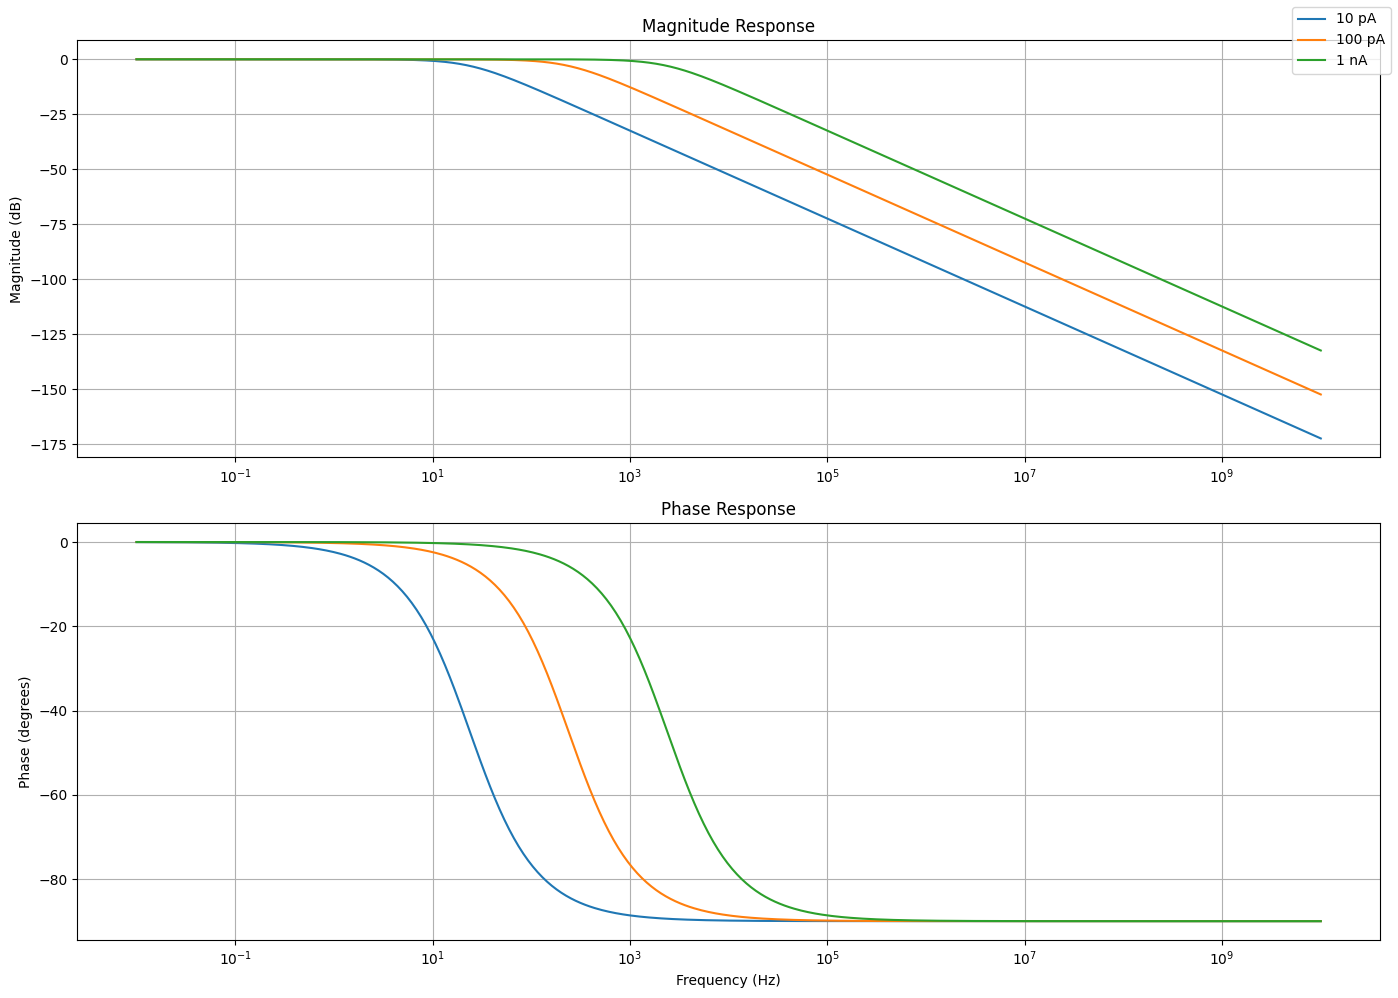

In [47]:
labels = ["10 pA", "100 pA", "1 nA"]

# Create a figure with two subplots for magnitude and phase
plt.figure(figsize=(14, 10))

# Iterate over each system and its label
for system, label in zip(system_list, labels):
    # Calculate the Bode plot data for the system
    w, mag, phase = signal.bode(system, frequencies * 2 * np.pi)

    # Plot the magnitude response with label
    plt.subplot(2, 1, 1)
    plt.semilogx(w/(2*np.pi), mag, label=label)  # Convert w back to Hz

    # Plot the phase response with label
    plt.subplot(2, 1, 2)
    plt.semilogx(w/(2*np.pi), phase, label=label)  # Convert w back to Hz

# Configure the magnitude plot
plt.subplot(2, 1, 1)
plt.title('Magnitude Response')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')

# Configure the phase plot
plt.subplot(2, 1, 2)
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')

# Add a legend to the figure
plt.figlegend(labels, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
